In [79]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset_suffix = '2-200-8-50-100-100-0'

datasets = ['eq',
            'matern',
            'noisy-mixture-slow',
            'weakly-periodic-slow']

datasets = [f'{dataset}-{dataset_suffix}' for dataset in datasets]

root = '../experiments/synthetic/results'

In [44]:
models = [
    ['convGNP', 'meanfield'],
    ['convGNP', 'innerprod'],
    ['convGNP', 'kvv'],
    ['convNP', 'meanfield']
]

In [71]:
def get_model_log_likelihood(root, dataset, model, cov):
    
    filename = f'{root}/{dataset}/models/{model}/{cov}/homo/identity/seed-0/dim-2/test_log_likelihood.txt'
    
    file = open(filename, 'r')
    nll = file.read()[:-2]
    
    return -float(nll)


def get_oracle_log_likelihood(root, dataset):
    
    filename = f'{root}/{dataset}/models/oracle/seed-0/dim-2/test_nll_mean.txt'
    
    file = open(filename, 'r')
    ll = file.read()[:-2]
    
    filename = f'{root}/{dataset}/models/oracle/seed-0/dim-2/test_diag_nll_mean.txt'
    
    file = open(filename, 'r')
    ll_diag = file.read()[:-2]
    
    return float(ll), float(ll_diag)

In [72]:
!ls ../experiments/synthetic/results/eq-2-200-8-50-100-100-0/models/convGNP/meanfield/homo/identity/seed-0/dim-2

args_file.txt	    num_params.txt
checkpoint.pth.tar  test_log_likelihood_standard_error.txt
data_location.txt   test_log_likelihood.txt
last_epoch.txt	    test_time.txt
log		    train_time.txt
model_best.pth.tar


In [73]:
!cat ../experiments/synthetic/results/eq-2-200-8-50-100-100-0/models/convGNP/meanfield/homo/identity/seed-0/dim-2/test_log_likelihood.txt

35.33067758775407

In [74]:
get_log_likelihood(root=root, dataset=datasets[3], model='convNP', cov='meanfield')

-1.2480321440344

In [75]:
!ls ../experiments/synthetic/results/eq-2-200-8-50-100-100-0/models/oracle/seed-0/dim-2/

test_diag_nll_mean.txt	test_nll_error.txt  test_time.txt
test_diag_nll_std.txt	test_nll_mean.txt


In [119]:
markers = ['^', '^', '^', 'P']
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple']
legend_labels = ['ConvGNP (meanfield)', 'ConvGNP (linear)', 'ConvGNP (kvv)', 'ConvNP']

-35.330677587754
0.33180940451644
1.01892188372778
0.452040498886648
* 1.1311805898361
-11.2331000256074
-0.176774469021207
0.469952724174766
-0.115239317906215
* 0.55456364002559
-4.977406009867
-0.79471449310213
0.118659637749615
-0.65123518024901
* 0.297727842694501
-1.3328348499698
-1.24805741350938
-1.11577138603893
-1.2480321440344
* -1.00910562064627


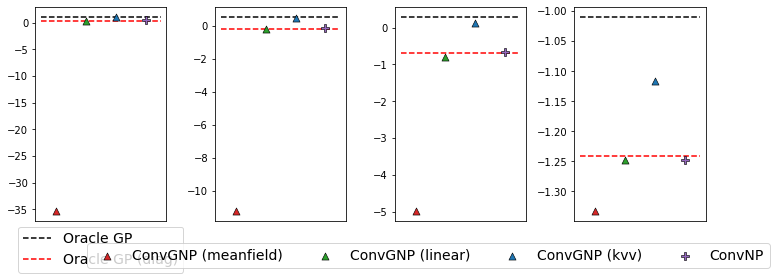

In [129]:
fig = plt.figure(figsize=(10, 4))

for i, dataset in enumerate(datasets):
    
    plt.subplot(1, 4, i+1)
    
    print('===========================================')
    for j, ((model, cov), (marker, color)) in enumerate(zip(models, zip(markers, colors))):
        
        loglik = get_model_log_likelihood(root=root,
                                          dataset=dataset,
                                          model=model,
                                          cov=cov)
        
        print(loglik)
        
        plt.scatter(j,
                    loglik,
                    marker=marker,
                    c=color,
                    zorder=2,
                    s=50,
                    linewidth=0.6,
                    edgecolor='k',
                    label=legend_labels[j])
        
    loglik, loglik_diag = get_oracle_log_likelihood(root=root,
                                                    dataset=dataset)
    
    plt.plot([-0.5, 3.5], [loglik, loglik], '--', color='black', zorder=1, label='Oracle GP')
    plt.plot([-0.5, 3.5], [loglik_diag, loglik_diag], '--', color='red', zorder=1, label='Oracle GP (diag)')
    plt.xticks([])

    print("*", loglik)
    
    handles, labels = plt.gca().get_legend_handles_labels()

# fig.legend(handles[:2], labels[:2])
fig.legend(handles[:2], labels[:2], loc='lower left', ncol=1, fontsize=14, bbox_to_anchor=(0.02, 0.015, 0.10, 0.10))
fig.legend(handles[2:], labels[2:], loc='center', ncol=4, fontsize=14, bbox_to_anchor=(0.4, 0.0, 0.4, 0.2))
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.22)
plt.show()